# Outline
* Introduction to Ramsey Model
* Laibson/Baro modifications
* Describe the problem we were asked to solve
* Define our system
* Explain our method of solving backwards and bisecting for the correct starting value
* Define numerical methods for solving the system
* Solve the system using our method
* Explain why results are relevant


* Stability Analysis using the Jacobian
* Explain Jacobian results
* Time elimination method
* Explain why results are relevant

* Conclusion/What did we accomplish

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
import operator
from scipy.special import roots_laguerre
from IPython.display import Image
from IPython.core.display import HTML 

import timeit

np.seterr(all="ignore")

from Numerical_Methods import *

ModuleNotFoundError: No module named 'Numerical_Methods'

# Introduction to the Ramsey Model

### What is the Ramsey Model?

The Ramsey–Cass–Koopmans model, or Ramsey growth model, is a neoclassical model of economic growth based primarily on the work of Frank P. Ramsey. The Ramsey Model includes a system of equations for Capital (represented by K) and Consumption (represented by C). Together, we try to model the optimal growth of the economy so that we can optimize consumption and capital. Within these models, we can add functions or variables that acount for behavioral economics such as commitment technologies, present bias, and/or discounting. By the end of this study, we added these things to the Ramsey Model:
- the depreciation of capital
- the cost of technological upkeep
- present bias
- discounting
- how effective present bias is (in the short-term)
- time
- the cost of effective worker upkeep

### Modifications of the Ramsey model: a History

The Ramsey Model has been created and modified by many people over time. For instance, it is actually called the Ramsey-Cass-Koopmans model because it was originally developed by these three people. From there, it has been edited by both Laibson and Barro.

##### What the Ramsey Model was initially:

$\begin{array}{l}
\frac{d c}{d t}=0.5 \mathrm{ck}^{-0.5}-0.1 c \\
\frac{d k}{d t}=k^{0.5}-c
\end{array}$

##### How do we go about solving this?
This is an Initial Value Problem, so we solve it "forwards" or "backwards" given some initial conditions. 

For what we call "forwards" solving, these initial conditions are literally the initial values, and specify where we should begin modeling from. In our case, Economists want to find the Policy Function which is the equation that will take us to the steady state solution. This means we do not necessarily know what our initial values are. Therefore, we instead try to work "backwards" from the steady state solution.

This means, for what we call "backwards solving", we perturb, or move, slightly off of the steady state solution by some infinitesimal value and try to solve the equation backwards to find the initial values.

For our equations, we are given the initial k-value, so when solving forwards, we use it and some found c-value, otherwise, when bacwards solving, we try to work backwards from the steady state so that we arrive perfectly at the given k-value, which proves difficult. We will outline throughout this notebook how we went about doing this.

##### Definining some terms:

For clarification, the steady state solution is where the "isoclines", a.k.a. "nullclines", of our system meet. In other words, setting the equations from our system to zero, we solve for k and c, and these resulting k and c equations are our isoclines. We then find where these two lines meet. That point is our steady state solution. Theoretically, it is where k and c are stable and will NOT shoot off towards infinity. To be more clear, we are dealing with an unstable system, so if we are even slightly off of the steady state solution, our so-called solution will shoot off towards infinity or drop to zero, which is not ideal when we are trying to model our economy (for instance, we cannot maintain infinite consumption).  

##### What is an Initial Value Problem (IVP)?
An IVP is an ordinary differential equation that also has an initial condition. This initial condition specifies a specific solution, a function, for a given time frame within the domain. Modeling systems frequently means in the sciences, such as Economics for us, solving an initial value problem. For that context, the resulting equation models how the system evolves with time given the initial conditions.

In [2]:
sys = [lambda t, k,c : k**0.5 - c, lambda t, k,c : 0.5*c*(k)**(-0.5) - 0.1*c]

##### Forward-solving the original Ramsey Model:

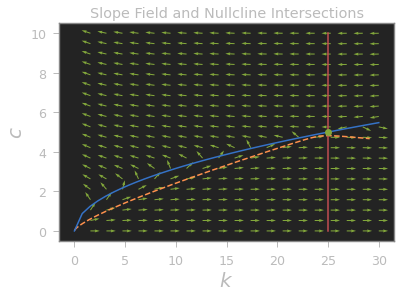

In [3]:
plot_flow(sys, [0, 30], [0, 10], 20)

#solving forward:
tf = 75

plot_IVP(sys, [0.01285009, 0.02446086], [0, tf]);

#add isoclines:
k = np.linspace(0,30,40)
c = np.sqrt(k) # dk = sqrt(k) - c with dk = 0
# dc = 0 implies 0.5/sqrt(k) - 0.1 = 0 so k = 25
plt.plot(k,c,'b',[25,25],[0,10],'r',25,5,'go')
plt.xlabel('$k$',size=20)
plt.ylabel('$c$',size=20);

##### Backward-solving the original Ramsey Model:

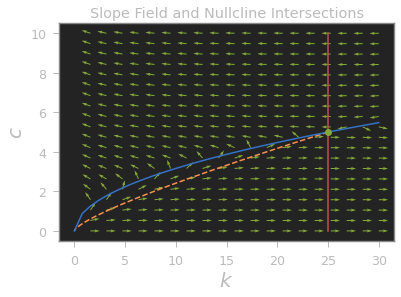

In [4]:
# the blue and red lines are isoclines, and the yellow dashed line is our solution to this IVP problem.
# we didn't modify the k-value of the isocline intersection, but we perturbed slightly off of the c-value.

plot_flow(sys, [0, 30], [0, 10], 20)

k0 = 25
perturbation = 0.01
c0 = 5-perturbation
tf = 300 

plot_IVP(sys, [k0, c0], [tf, 0]);

#add isoclines:
k = np.linspace(0,30,40)
c = np.sqrt(k) # dk = sqrt(k) - c with dk = 0
# dc = 0 implies 0.5/sqrt(k) - 0.1 = 0 so k = 25
plt.plot(k,c,'b',[25,25],[0,10],'r',25,5,'go')
plt.xlabel('$k$',size=20)
plt.ylabel('$c$',size=20);

# Laibson and Baro's Modifications to the Ramsey Model

### What Laibson added:

### What Baro added:

First, Baro added depreciation of capital, $\delta$, and discounting in the form of $\frac{\rho}{\beta}$, $\rho$ being the lower bound of present bias, i.e. how does a rational person that is not affected by present bias view this capital, and $\beta$ being the upper bound of present bias, or how does the person being affected by present bias view it. 

$\begin{array}{l}
\dot{c}=c\left(\alpha k^{\alpha-1}-\delta-\frac{\rho}{\beta}\right) \\
\dot{k}=k^{\alpha}-c-\delta k
\end{array}$

In simpler terms, think of how a person views going to the gym today versus how they view planning to go the gym. In the former, a person is usually much less willing to go compared to our willinging to plan to go to the gym.



# Our Problem
### Barro adds present bias and commitment technologies (sorta) by adding 𝜆, which is solved for here:

##### we can approximate Ω which is defined as:

$\Omega=e^{-(b / \gamma)} \int_{0}^{\infty} e^{(b / \gamma)\left(e^{-\gamma v}\right)} e^{-\rho v} d v$

##### And adding n for the effective workers we get:

$\Omega \equiv \int_{0}^{\infty} e^{-[(\rho-n) v+\phi(v)]} d v$
 
##### where 𝜙(𝑣)  is defined as:

$\phi(v)=(b / \gamma) \cdot\left(1-e^{-\gamma v}\right)$ 

which represents present bias.

##### lambda is then solved for like this:

$\lambda=n+(1 / \Omega).$

More technically, 𝜆 represents the "effective" rate of time preference. It is "effective" because we are approximating by linearlizing. In this way, we find out by how much that present bias is effecting our decision. The actual, non-approximated value will be large in the short term, and small in the long term. But, using lambda will give us an idea. For more information about this term and the approximation used, see Baro's paper "Laibson Meets Ramsey in the Neoclassical Growth Model."

and where 

${ρ ≤ 𝜆 ≤ ρ+𝜙'(0)}$ 

and $ρ$ would be our general appreciation without present bias

𝜆 plays a role in finding the steady state solutions for $\dot{k}$ and $\dot{c}$, which are defined as:

$ \begin{array}{l}
\dot{c}=c\left(\alpha k^{\alpha-1}-\delta-x-\rho-b e^{-\gamma(t-\tau)}\right) \\
\dot{k}=k^{\alpha}-c-(\delta+x+n) k
\end{array}$

To find the steady state solutions, each equation is set equal to zero, and $\rho-b e^{-\gamma(t-\tau)}$ is replaced with either $\lambda$ or $\rho$ within the first equation, $\dot{c}$, depending on whether we are solving the short-term or long-term steady state solution

When solving using $\lambda$ (for the short-term steady state solution):

$\dot{c}=0=\alpha k^{\alpha-1}-\delta-x-\lambda$

we are also solving for what is known as the no commitment steady state. This is because, in the short term, it is like there is no commitment technologies effecting the present bias, so the present bias $\lambda$ is very present. This results in the short-term capital steady state,  $k_{0}^{*}$, and the short_term consumption steady state,  $c_{0}^{*}$

when solving using $\rho$ (for the long-term steady state solution):

$\dot{c}=0=\alpha k^{\alpha-1}-\delta-x-\rho$

we are also solving for what is known as the full commitment steady state. This is because, in the long term, present bias is no longer effective and it disapears, becoming the base amount of utility that we can foresee from the capital without present bias affecting our judgement, $\rho$.

This also means that $\left(k_{\infty}^{*}-k_{0}^{*}\right) / k_{0}^{*}$ is the relative measure between our long-term capital and our short-term capital. In other words, this is the difference between our long-term steady state and our short-term steady state of capital. The same applies to the relative measure of consumption,  $\left(c_{\infty}^{*}-c_{0}^{*}\right) / c_{0}^{*}$ .



# The System to Solve

##### Barro's Full commitment:

$ \begin{array}{l}
\dot{c}=c\left(\alpha k^{\alpha-1}-\delta-x-\rho-b e^{-\gamma(t-\tau)}\right) \\
\dot{k}=k^{\alpha}-c-(\delta+x+n) k
\end{array}$

### Contextual meanings of constants:
* α - the marginal product of capital (represents the effectiveness of investing)
* δ - depreciation of capital per time step
* x - cost of technological upkeep on capital per time period (usually 1 year)
* b - the maximum effect of present bias (Ex: 1 apple now or 2 in 20 years)
* ρ - the constant rate of time preference. (Base utility we get without present bias, or the lower bound of present bias.)
* γ - effectiveness of present bias in the short-term (rate of decay in present bias over time)
* τ - represents the point of time in question, whereas t means the current point in time. So, (t-τ) represents "In how long will I see the benefits?"
* n - the average cost of upkeep per effective worker. ()
* λ - represents the effective rate of time preference (present bias)

#### Define constants
These are the constants used in the paper "Laibson Meets Ramsey in the Neoclassical Growth Model."

In [5]:
α = 0.75
δ = 0.05
x = 0.02
b = 0.5
ρ = 0.02
γ = 0.5
τ = 0.0
n = 0.01
λ = 0.036528

# Explanation of Our Method of Solving Backwards
Due to the nature of full commitment not being solvable by the same means no commitment was (the time elimination method by which the time variable is effectively removed from the equation as it was implicit in nature and can simply be removed by performing those operations), the full commitment case must be solved backwards from the equilibrium values found previously through solving the system of equations, the “solution” that will be found by this solver will come at roughly k(0) which had been calculated to be one quarter (¼) of k*(0) (this is the equilibrium solution for the non-commitment case of a given system, ex: $k_0^*=2459.49884228438$ by which k(0) is roughly 614.22 for column 1) 

By using a “shooting” method alongside a numerical value estimation technique such as the bisection or secant method (by which were chosen due to their non-reliance on taking a derivative as the given equations would not be easy to work with in terms of their derivatives). This means we can therefore “get off” or perturb on both sides of the equilibrium solution (above and below) for c*(inf) (ex: 192.90 for column 1), we can safely narrow down where exactly the initial point must be in order for the given equations to result in that equilibrium solution that was the starting point of the solver. Thus as an example (which may or may not be shown below) for the first column this resulting value is roughly 77.2. 

The benefit of this implementation in particular is the only variables that are needed to be given to solve for this value are a final time value (ex: 120 for columns 1-3 seemed to be a good fit) and a maximum iteration count by which is essentially just a limit for how many iterations the solver is required/allowed to do before giving up (by which does not seem to be reached unless set fairly/very low. (Additionally it has been discovered that as the overall range of vallues occuring through the system of equations lowers the boundary by which restricts the intepolation/shooting method needs to be lowered in an equivalent fashion, see next paragraph)

NOTE: For columns 4-6 tf=50-55 these should provide accurate c(0)'s for all the columns from the original table we were working with, additionally the bound variable (which had been set to [0,100] for the previous 3 cases) is now changed to [0,0.01] this is in order to assure the bounding of the graph is more accurate given the much smaller scale of the values overall when alpha is changed to that lower value.

Using the intuition that can be gathered from the 6 test cases we had initially been given (need link to paper proper) it would appear that alpha is the main variable of concern regarding when the desired modifiable variables must be modified, for instance in the case sprovided split evenly between alpha = .75 and alpha = .33 it was found that tf only needed to be different 3 times (this may just come from calculation variance and not necessarily the reliance on tf strictly) tf was 120 for all cases by which alpha = .75 and was either 55 or 50 depending on the column for alpha = .33, there is a rough mathematical formula that can be used to calculate a ballpark value by which other alpha values could be tested, start by taking the alpah values you are working with (say .33) and divide that by a preexisting alpha value you know tf for (because there has already been test cases here try .75 but additionally later .33 could be used this is for the sake of example) By which this percentage relative to the previous alpha value is then multiplied by the tf for the same alpha value (so for alpha = .75 tf=120)

An example of the previous calculations to get a ballpark value for tf for alpha = .33 would look like the following:

.33/.75 = .44

.44(120) = 52.8

52.8 is roughly between 50 and 55 which was what had been used to find solid initial values for c(0) in all cases tested.

# Solving the System Using Our Method

### Recreating the table from the Baro paper

In [6]:
def plot_time_series(sys, init, tspan, h=None, is_forward=None):
    # Choose the missing parameters
    forward = tspan[1] > tspan[0]
    if is_forward == None:    
        is_forward = operator.lt if forward else operator.gt
        #print(f'Choosing stopping method {"forward" if forward else "backward"}.')
    if h == None:
        h = .01 if forward else -.01
    #print(f'Choosing step size {h}.')
    t,v = solve_IVP(sys, init, tspan, h, is_forward)
    plt.plot(t,v[:,1],'y--');
    plt.plot(t[0], init[1], 'r.')
    plt.xlabel('$t$',size=20)
    return t,v

In [7]:
# for use of the Gauss-Laguerre Quadrature when solving for lambda:
# f(x) = e^(-phi'(v))
def f(x):
    return np.exp( -((b/γ)*(1-np.exp(-γ*x))))

def gauss_laguerre_quadrature(f,conversion,N): 
    x,w = roots_laguerre(N)
    
    #need to become e^(-x)
    x=x*conversion
    w=w*conversion

    return sum(f(x)*w)

In [9]:
N=100
data = [[0.75,0.75,0.75, 0.33, 0.33, 0.33],
        [ 0.5, 0.2, 0.1,  0.5,  0.2,  0.1],
        [],
        [],
        []]

λ_data = []
b_data = data[1]

kinf_steady = []
cinf_steady = []
k0_steady = []
c0_steady = []

for b in b_data:
    convertWith = 1/(ρ-n)
    Ω = gauss_laguerre_quadrature(f,convertWith,N)
    λ = n + 1/Ω
    λ_data.append(λ)
data[2] = λ_data

alpha = data[0]
k_relative_measure = []
c_relative_measure = []

for i in range(6):
    kinf = ((δ+x+ρ)/alpha[i])**(1/(alpha[i]-1))
    cinf = kinf**alpha[i]-(δ+x+n)*kinf
    kinf_steady.append(kinf)
    cinf_steady.append(cinf)
    #print(kinf)
    #print(cinf)
    
    k0=((δ+x+λ_data[i])/alpha[i])**(1/(alpha[i]-1))
    c0 = k0**alpha[i]-(δ+x+n)*k0
    k0_steady.append(k0)
    c0_steady.append(c0)
    #print(k0)
    print(c0)
    
    k_rm = (kinf-k0)/k0
    c_rm = (cinf-c0)/c0
    k_relative_measure.append(k_rm)
    c_relative_measure.append(c_rm)
        
data[3] = k_relative_measure
data[4] = c_relative_measure

table = pd.DataFrame(data[:5], columns=["(1)","(2)","(3)","(4)","(5)","(6)"], 
                     index = ["α","b = φ'(0)", "λ", 
                              '<img src="https://cdn.discordapp.com/attachments/557363729759469578/726067490941304932/unknown.png" alt="img">', 
                              '<img src="https://cdn.discordapp.com/attachments/557363729759469578/726084138192339024/unknown.png" alt="img">'])
display(HTML(table.to_html(escape=False)))

152.41947882152192
181.79345158857245
188.06452700089557
1.3127463226618776
1.333711947728847
1.3374239826229046


,(1),(2),(3),(4),(5),(6)
α,0.750000,0.750000,0.750000,0.330000,0.330000,0.330000
b = φ'(0),0.500000,0.200000,0.100000,0.500000,0.200000,0.100000
λ,0.036528,0.024792,0.022164,0.036528,0.024792,0.022164
,0.962868,0.230583,0.099718,0.286139,0.080497,0.036104
,0.265594,0.061101,0.025718,0.020842,0.004795,0.002006


### Methods for finding perturbation

In [10]:
def LF_secant_method(MAX_IT, tolerance):
    
    tic = timeit.default_timer()
    i=0
    error = tolerance+1
    eps = 1e-4
    
    c_upper = cinf_steady[table_i]+eps #the "plus eps" is to give something other than the steady state
    c_lower = cinf_steady[table_i]-eps
    k_init = kinf_steady[table_i]
           
    #find initial k_lower
    init_pt = [k_init, c_lower]
    t, v = plot_time_series(full_commitment, init_pt,[tf,0]) #backward solve
    k_lower = v[-1][0]
    
    # REMOVED FIND INITIAL K_UPPER -- FIND IT WITHIN THE LOOP
    
    while (i<MAX_IT and error > tolerance):
        
        # Evalute the function
        fl = k_lower-init_k0

        #find k_upper
        init_pt = [k_init, c_upper]
        t, v = plot_time_series(full_commitment, init_pt,[tf,0]) #backward solve
        k_upper = v[-1][0]

        # STORE K_UPPER TO BE SWAPPED TO K_LOWER AFTER ITS USED IN FU COMPUTATION
        tmpk = k_upper

        fu = k_upper-init_k0
        # ELIMINATE IVP SOLVE AT THIS STEP -- SWAP K_UPPER INTO K_LOWER INSTEAD
        #find k_lower
        k_lower = tmpk

        #find c_upper and c_lower
        tmp = c_upper
        c_upper = c_lower - fl*(c_upper-c_lower)/(fu-fl) #need to use the old c_lower
        c_lower = tmp
        
        # Compute the error using the Cauchy-criterion for convergence
        error = np.fabs(c_lower-c_upper)
        i+=1
        # print(f'iteration {i}')
        
    toc = timeit.default_timer()
    
    cstart = (init_k0-k_lower)*(c_upper-c_lower)/(k_upper-k_lower)+c_lower
    init_pt = [k_init, cstart]
    
    print('Run complete in {:4.2f} seconds.'.format(toc-tic))   
    return p

In [11]:
def LF_bisection_method(bound, MAX_IT, tolerance):
    
    tic = timeit.default_timer()
    i=0
    error = tolerance+1
    
    while (i<MAX_IT and error > tolerance):
        
        p = (bound[0]+bound[1])/2
        
        init_pt = [kinf_steady[table_i], cinf_steady[table_i]-p]
        
        t, v = plot_time_series(full_commitment, init_pt,[tf,0]) #backward solve
        found_k0 = v[-1][0]
        
        if(found_k0 < init_k0):
            bound = [bound[0], p]
        
        elif(found_k0 > init_k0):
            bound = [p, bound[1]]
        
        else:
            break
        
        error = np.fabs(bound[0]-bound[1])/2
        i+=1
        # print(f'iteration {i}')
        
        
    toc = timeit.default_timer()
    
    #To-do: add interpolation here for more accuracy
    
    print('Run complete in {:4.2f} seconds.'.format(toc-tic))   
    return p, bound
    

In [12]:
table_i=1 #location in the table

α=alpha[table_i]
λ = λ_data[table_i]
b = b_data[table_i]

### Backward solving with Bisection/Secant methods

Run complete in 14.82 seconds.
[k(0), c(0)] for full commitment is currently [979.74364336  68.31024805]


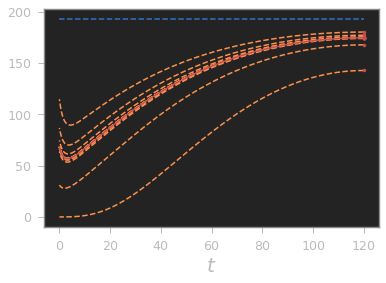

In [13]:
full_commitment = [lambda t, k,c : k**α-c-(δ+x+n)*k, lambda t, k,c : c*(α*k**(α-1)-δ-x-ρ-b*np.exp(-γ*(t-τ)))]

# solve the systems of equations for c0:
tf = 120
init_k0 = .25*k0_steady[table_i]

#full commitment steady state
plt.plot([0,tf], [cinf_steady[table_i], cinf_steady[table_i]], 'b--', label="full commitment steady state")

#solve for the perturbation off of the steady state that gives us an adequate c0
tolerance = 1e-4
MAX_IT=50
p, bound_of_p = LF_bisection_method([0,100], MAX_IT, tolerance)

#plot with the found perturbation
init_pt = [kinf_steady[table_i], cinf_steady[table_i]-p]
t, v = plot_time_series(full_commitment, init_pt,[tf,0])
plt.plot(t,v[:,1], 'r', label="full commitment")
print(f'[k(0), c(0)] for full commitment is currently {v[-1]}')

Run complete in 5.84 seconds.
[k(0), c(0)] for full commitment is currently [979.74364336  68.31024805]


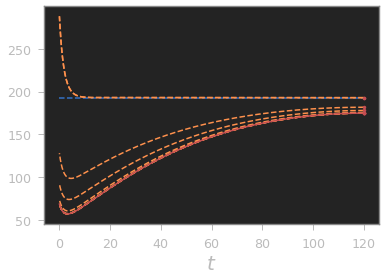

In [14]:
### Backward solving with the Secant method for finding the perturbation:

#full commitment steady state
plt.plot([0,tf], [cinf_steady[table_i], cinf_steady[table_i]], 'b--', label="full commitment steady state")

#solve for the perturbation off of the steady state that gives us an adequate c0
perturbation = LF_secant_method(MAX_IT, tolerance)

#plot with the found perturbation:
init_pt = [kinf_steady[table_i], cinf_steady[table_i]-perturbation]        
t, v = plot_time_series(full_commitment, init_pt,[tf,0])
plt.plot(t,v[:,1], 'r', label="full commitment")
print(f'[k(0), c(0)] for full commitment is currently {v[-1]}')

# Explanation of Results of our Method

# Stability Analysis using the Jacobian

##### System of Equations

Full Commitment:
\begin{align}
\dot{k} &= k^\alpha - \left(\delta + n + x\right)k - c\\
\dot{c} &= c\left(\alpha k^{\alpha - 1} - \left(\delta + x\right) - \left(\rho + be^{-\gamma t}\right) \right)
\end{align}

No Commitment:
\begin{align}
\dot{k} &= k^\alpha - \left(\delta + n + x\right)k - c\\
\dot{c} &= c\left(\alpha k^{\alpha - 1} - \left(\delta + x + \lambda\right) \right)
\end{align}

#### Jacobian of the System

$$J(k,c)=
\begin{bmatrix}
\alpha k^{\alpha-1}-\left(\delta+n+x\right) & -1\\
\alpha(\alpha-1)ck^{\alpha-2} & \alpha k^{\alpha - 1} - \left(\delta + x\right) - \left(\rho + be^{-\gamma t}\right)\\
\end{bmatrix}$$


When the Jacobian is at a steady state the $$\rho + be^{-\gamma t}$$ will be 0 as t approaches infinity.  

$$J(k,c)=
\begin{bmatrix}
\alpha k^{\alpha-1}-\left(\delta+n+x\right) & -1\\
\alpha(\alpha-1)ck^{\alpha-2} & 0\\
\end{bmatrix}$$


Through this we can find the eigenvalues and eigenvectors of the Jacobian matrix to check the stability of the system as  it is centered at the steady state. 

In [3]:
def nullcline_intersection(sys, r):
    x, y = sp.symbols('x, y')
    eq1 = sys(x, y, r)[0]
    eq2 = sys(x, y, r)[1]
    sols = sp.solve([eq1, eq2], [x, y])
    return np.array(sols,dtype=float)

In [4]:
def jacsys(k,c,r):
    alpha, delta, xt, n, rho, b, gamma = r[0], r[1], r[2], r[3], r[4], r[5], r[6]
    J = np.array([[alpha*k**(alpha-1)-(delta+xt+n), -1],
    [c*alpha*(alpha-1)*k**(alpha-2), 0]])
    return J

In [5]:
# Use the RK4 solver to complete Linearizing the Jacobian 
def rk4(t,y,h,func,J):
    k1 = h*func(t,y,J)
    k2 = h*func(t+0.5*h,y+0.5*k1,J)
    k3 = h*func(t+0.5*h,y+0.5*k2,J)
    k4 = h*func(t+h,y+k3,J)
    return (k1 + 2*k2 + 2*k3 + k4)/6

# Homebrew Solver: Euler's Method
def rk4_solve(t0,tf,h,y0,func,J):
    tv, yv, = [], []
    t, y = t0, y0
    while t < tf:
        y += rk4(t,y,h,func,J)
        t += h
        yv.append(y.copy())
        tv.append(t)
    return np.array(tv), np.array(yv)

# Take the values close to the steady-point to see the stability around each point placed in J
def F(t,U,J):
    # System of Equations
    return np.array([ J[0,0]*U[0] + J[0,1]*U[1],
                      J[1,0]*U[0] + J[1,1]*U[1]])

###### Values Used

Values of this problem are shown around the original first column values in Barrows table.

The kzed, czed and kinf, cinf are calculated by linearizing \dot{k}, \dot{c}.

In [6]:
alpha, delta, xt, n, rho, b, gamma = 0.75, 0.05, 0.02, 0.01, 0.02, 0.5, 0.5
r = (alpha, delta, xt, n, rho, b, gamma)
lam = .03653

# Equations of k*_0 and c*_0 for No Commitment
kzed = (alpha/(delta + lam + xt))**(1/(1-alpha)) 
czed = kzed**alpha - (delta + n + xt)*kzed 

# Equations of k*_inf and c*_inf for Full Commitment
kinf = (alpha/(delta + rho + xt))**(1/(1-alpha)) 
cinf = kinf**alpha - (delta + n + xt)*kinf

##### Based on the Commitment Type we are able to analyze the different stabilities created by the different states. 

To analyze a different commitment, simply change the CommitmentType, True represents the Full Commitment and False represents No Commitment. 

In each case the derivative of that equations is used to set up their specific Jacobian using the correct steady-state and derivatives. 

###### The Eigenvalues
Based on the eigenvalues of the Jacobian we are able to see how the area around the steady-state will react, whether it is stable, semi-stable, or unstable. The eigenvalues having a switched sign (one positive, one negative), it shows this problem is semi-stable, with a saddle point. 

This can be analyzed by the converging or diverging of the values to and away from the the centeralized steady point. 

In [7]:
# To Test Full or No Commitment change below
# True = Full Commitment 
# False = No Commitment
CommitmentType = True

if CommitmentType:    
    # Jacobian of the Full Comittment Case
    def dFull(k,c,r):
        alpha, delta, xt, n, rho, b, gamma = r[0], r[1], r[2], r[3], r[4], r[5], r[6]
        G1 = k**alpha - (delta+xt+n)*k - c
        G2 = c*(alpha*k**(alpha-1) - (delta+xt) - rho) # b*exp(-gamma*t) -> 0 as t -> infty
        return [G1, G2]
    
    eq = nullcline_intersection(dFull,r)
    Jacobian = jacsys(kinf,cinf,r) 
    Jentries = np.array([[Jacobian[0,0],Jacobian[0,1]],[Jacobian[1,0],Jacobian[1,1]]])
    print("The Full Commitment Case:")
    
else:
    # Jacobian of the No Comittment Case
    def dNo(k,c,r):
        alpha, delta, xt, n, rho, b, gamma = r[0], r[1], r[2], r[3], r[4], r[5], r[6]
        G1 = k**alpha - (delta+xt+n)*k - c
        G2 = c*(alpha*k**(alpha-1) - (delta+xt) - lam)
        return [G1, G2]
    
    eq = nullcline_intersection(dNo,r)
    Jacobian = jacsys(kzed,czed,r)
    Jentries = np.array([[Jacobian[0,0],Jacobian[0,1]],[Jacobian[1,0],Jacobian[1,1]]])
    print("The No Commitment Case:")

print("The Jacobian Matrix of the No Committment case:")
print(Jacobian)
print(" ")
ew, ev = np.linalg.eig(Jacobian)
print('The Eigenvalues: {}'.format(ew))
print('The Eigenvectors as columns: {}'.format(np.dot(np.linalg.inv(ev),np.dot(Jacobian,ev))))

The Full Commitment Case:
The Jacobian Matrix of the No Committment case:
[[ 1.e-02 -1.e+00]
 [-9.e-04  0.e+00]]
 
The Eigenvalues: [ 0.03541381 -0.02541381]
The Eigenvectors as columns: [[ 3.54138127e-02  3.46944695e-18]
 [ 0.00000000e+00 -2.54138127e-02]]


###### Plotting the values about the steady-state that is centered around [0,0]. 

Through the use of the RK4 solver, by taking values from the the four quadrants about the steady-state of each No and Full Commitment case, we are able to see the stability of each of these areas.

Each of these quadrands are shown below, with the line highlighted in different colors. The green dots represent the original value of where the line starts and how it vears to the steady point or moves away.

Due to the graph structure, each of these lines look as though they are straight, although when zoomed into each line it is easier to see the curvature of each values stability.  

Full Commitment Case:


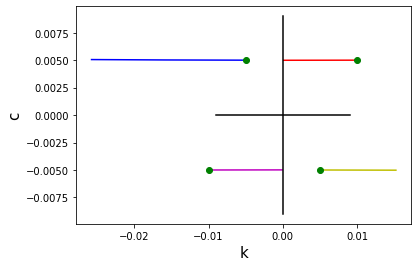

In [8]:
UpLfQ = [-0.005, .005]  # Value in upper left quadrant (Blue)
UpRtQ = [0.01, .005]   # Value in upper right quadrant (Red)
LwLfQ = [-0.01, -0.005] # Value in lower left quadrantn(Purple)
LwRtQ = [0.005, -0.005]  # Value in lower right quadrant (Yellow)


t,v = rk4_solve(0,4,1e-2, UpLfQ,F,Jentries)
t2,v2 = rk4_solve(0,2,1e-2, UpRtQ,F,Jentries)
t3,v3 = rk4_solve(0,2,1e-2, LwLfQ,F,Jentries)
t4,v4 = rk4_solve(0,2,1e-2, LwRtQ,F,Jentries)

if CommitmentType == True:
    print("Full Commitment Case:")
else:
    print("No Commitment Case:")
    
    
plt.plot(v[:,0],v[:,1], 'b',v2[:,0], v2[:,1],'r',v3[:,0], v3[:,1],'m',v4[:,0], v4[:,1],'y',
         [-.009,.009],[0,0],'k',[0,0],[-.009, .009],'k', 
         UpRtQ[0], UpRtQ[1],'go',UpLfQ[0], UpLfQ[1],'go',LwRtQ[0],LwRtQ[1],'go',LwLfQ[0],LwLfQ[1],'go');

plt.xlabel('k',size=15)
plt.ylabel('c',size=15);

#### Showing of the paths about the stable steady-state.

The green circle is the starting point, and the direction the line goes shows the character of how that point reacts around the steady state.

As it is easier to see in these graphs, the North-East and South-West curves verge to the steady state.  While the North-West and South-East move away from the steady-state.

###### Saddle paths for above the stable point.

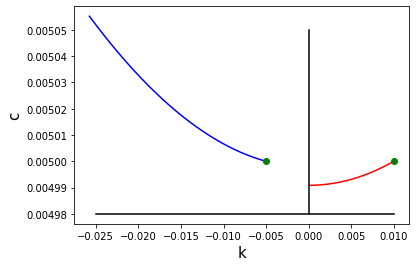

In [9]:
test = plt.plot(v[:,0],v[:,1], 'b', v2[:,0],v2[:,1], 'r',
         [0,0],[0.00498,.00505], 'black', [-.025, .010], [.00498,.00498], 'black',UpRtQ[0],UpRtQ[1],'go',UpLfQ[0],UpLfQ[1],'go');
plt.xlabel('k',size=15)
plt.ylabel('c',size=15);

###### Saddle paths for below the stable point.

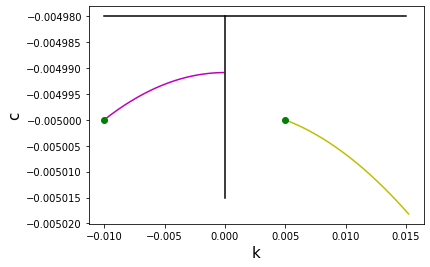

In [10]:
plt.plot(v3[:,0],v3[:,1], 'm', v4[:,0],v4[:,1], 'y',
         [0,0],[-0.00498,-0.005015], 'black', [-.010, .015], [-0.00498,-.00498], 'black', LwRtQ[0],LwRtQ[1],'go',LwLfQ[0],LwLfQ[1],'go');
plt.xlabel('k',size=15)
plt.ylabel('c',size=15);